In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.layers import base
from tensorflow.python.ops import nn
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

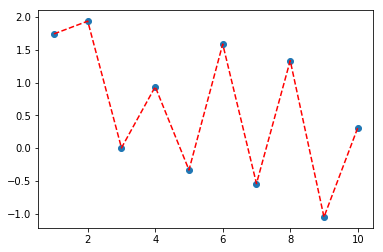

In [2]:
x = np.linspace(1,10,10).reshape(-1,1)
y = np.random.randn(10).reshape(-1,1)

plt.scatter(x, y)
plt.plot(x, y, 'r--')
plt.show()
plt.close()

x = tf.convert_to_tensor(x, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

In [3]:
class LinearFit(base.Layer):
  def __init__(self, units, activation=nn.relu):
    super(LinearFit, self).__init__()
    self.layer1 = tf.layers.Dense(units=units, activation=activation)
    self.layer2 = tf.layers.Dense(units=units, activation=activation)
    self.layer3 = tf.layers.Dense(units=1)
                                   
  def call(self, inputs):
    outputs = self.layer1(inputs)
    outputs = self.layer2(outputs)
    outputs = self.layer3(outputs)
    return outputs

In [4]:
def loss_fn(model, x, y):
  y_ = model(x)
  return tf.reduce_mean((y-y_)**2)

In [5]:
def relu6(features, min_val=0, max_val=1):
  return tf.minimum(tf.maximum(features, min_val),max_val)

In [6]:
model = LinearFit(units=500, activation=relu6)

In [7]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

tf.Tensor(1.3776708, shape=(), dtype=float32)
tf.Tensor(0.5475561, shape=(), dtype=float32)
tf.Tensor(0.54617804, shape=(), dtype=float32)
tf.Tensor(0.5096978, shape=(), dtype=float32)
tf.Tensor(0.48164767, shape=(), dtype=float32)
tf.Tensor(0.41492596, shape=(), dtype=float32)
tf.Tensor(0.35964745, shape=(), dtype=float32)
tf.Tensor(0.33566734, shape=(), dtype=float32)
tf.Tensor(0.2056118, shape=(), dtype=float32)
tf.Tensor(0.17401722, shape=(), dtype=float32)
tf.Tensor(0.08096804, shape=(), dtype=float32)
tf.Tensor(0.060912717, shape=(), dtype=float32)
tf.Tensor(0.008824693, shape=(), dtype=float32)
tf.Tensor(0.0010215304, shape=(), dtype=float32)
tf.Tensor(6.181824e-05, shape=(), dtype=float32)
tf.Tensor(2.6450155e-06, shape=(), dtype=float32)
tf.Tensor(7.364823e-08, shape=(), dtype=float32)
tf.Tensor(1.0661996e-09, shape=(), dtype=float32)
tf.Tensor(8.515983e-13, shape=(), dtype=float32)
tf.Tensor(1.2997532e-13, shape=(), dtype=float32)


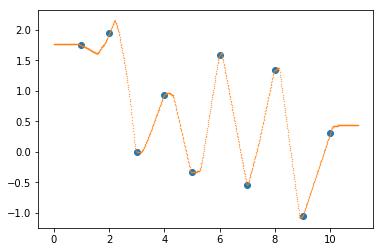

In [8]:
for i in range(2000):
  loss = loss_fn(model, x, y)
  grads = tfe.implicit_gradients(loss_fn)(model, x, y)
  optimizer.apply_gradients(grads)
  #optimizer.minimize(lambda: loss_fn(model, x, y))
  if i%100 == 0:
    print(loss)

x_ = tf.convert_to_tensor(np.linspace(0, 11, 1000).reshape(-1,1), tf.float32)
y_ = model(x_)

plt.scatter(x.numpy(), y.numpy())
plt.scatter(x_.numpy(), y_.numpy(), s=.1)
#plt.plot(x.numpy(), y.numpy(), 'r--')
plt.show()
plt.close()